DÉBUT DES EXERCICES BERT ET GPT
✓ Imports de base chargés avec succès
⚠️  Erreur d'import: No module named 'transformers'
Installez avec: pip install transformers torch datasets

CRÉATION DU DATASET DE DÉMONSTRATION
✓ Dataset créé avec 20 échantillons

Premiers échantillons:
  1. [positif] Ce film est absolument fantastique, je le recomman...
  2. [négatif] J'ai détesté ce livre, il était très ennuyeux et m...
  3. [positif] Le service client était excellent, très satisfait ...


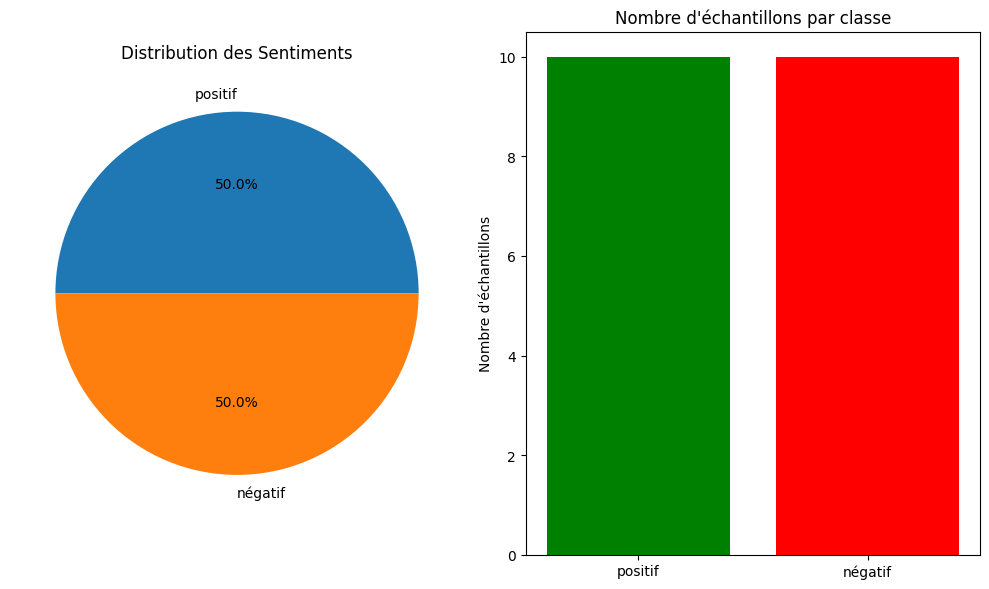


EXERCICE 7 : BERT POUR LA CLASSIFICATION DE TEXTE

1. PRÉPARATION DES DONNÉES
----------------------------------------
✓ Données d'entraînement: 14 échantillons
✓ Données de test: 6 échantillons
✓ Distribution train - Positif: 7, Négatif: 7
✓ Distribution test - Positif: 3, Négatif: 3

2. MODÈLE DE RÉFÉRENCE : NAIVE BAYES
----------------------------------------
✓ Vectorisation TF-IDF terminée
✓ Dimensions des features: 68
✓ Modèle Naive Bayes entraîné
✓ Précision Naive Bayes: 0.6667

3. MODÈLE BERT POUR LA CLASSIFICATION
----------------------------------------
Chargement du modèle BERT...
⚠️  Utilisation d'un modèle BERT alternatif: name 'AutoTokenizer' is not defined


NameError: name 'pipeline' is not defined

In [ ]:
print("=" * 80)
print("DÉBUT DES EXERCICES BERT ET GPT")
print("=" * 80)

# Imports essentiels pour le traitement de texte et l'apprentissage automatique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("✓ Imports de base chargés avec succès")

# Imports spécialisés pour les transformers et BERT/GPT
try:
    from transformers import (
        BertTokenizer, BertForSequenceClassification,
        GPT2LMHeadModel, GPT2Tokenizer,
        AutoTokenizer, AutoModelForSequenceClassification,
        pipeline, Trainer, TrainingArguments
    )
    from datasets import Dataset
    import torch
    from torch.utils.data import DataLoader
    print("✓ Bibliothèque Transformers chargée avec succès")
    print(f"✓ PyTorch version: {torch.__version__}")
    print(f"✓ CUDA disponible: {torch.cuda.is_available()}")
except ImportError as e:
    print(f"⚠️  Erreur d'import: {e}")
    print("Installez avec: pip install transformers torch datasets")

print("\n" + "=" * 80)
print("CRÉATION DU DATASET DE DÉMONSTRATION")
print("=" * 80)

# Création d'un dataset d'exemple pour l'analyse de sentiment
sample_data = {
    'text': [
        "Ce film est absolument fantastique, je le recommande vivement !",
        "J'ai détesté ce livre, il était très ennuyeux et mal écrit.",
        "Le service client était excellent, très satisfait de mon achat.",
        "Produit de mauvaise qualité, je suis très déçu.",
        "Une expérience incroyable, je reviendrai certainement !",
        "Le repas était fade et le service décevant.",
        "Interface utilisateur intuitive et fonctionnalités utiles.",
        "Application bugguée, impossible de l'utiliser correctement.",
        "Excellent rapport qualité-prix, je recommande !",
        "Très mauvaise expérience, à éviter absolument.",
        "Le produit correspond exactement à mes attentes.",
        "Service après-vente inexistant, très frustrant.",
        "Design élégant et performances exceptionnelles.",
        "Prix trop élevé pour la qualité proposée.",
        "Livraison rapide et emballage soigné, parfait !",
        "Produit défaillant dès le premier usage.",
        "Interface moderne et facile à prendre en main.",
        "Documentation insuffisante, difficile à comprendre.",
        "Très bon investissement, content de mon choix.",
        "Fonctionnalité manquante, très décevant."
    ],
    'sentiment': [
        'positif', 'négatif', 'positif', 'négatif', 'positif',
        'négatif', 'positif', 'négatif', 'positif', 'négatif',
        'positif', 'négatif', 'positif', 'négatif', 'positif',
        'négatif', 'positif', 'négatif', 'positif', 'négatif'
    ]
}

df = pd.DataFrame(sample_data)
print(f"✓ Dataset créé avec {len(df)} échantillons")
print("\nPremiers échantillons:")
for i, row in df.head(3).iterrows():
    print(f"  {i+1}. [{row['sentiment']}] {row['text'][:50]}...")

# Visualisation de la distribution des classes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution des Sentiments')

plt.subplot(1, 2, 2)
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.title('Nombre d\'échantillons par classe')
plt.ylabel('Nombre d\'échantillons')
plt.tight_layout()
plt.show()






print("\n" + "=" * 80)
print("EXERCICE 7 : BERT POUR LA CLASSIFICATION DE TEXTE")
print("=" * 80)

# Préparation des données
print("\n1. PRÉPARATION DES DONNÉES")
print("-" * 40)

# Conversion des labels en format numérique
label_map = {'positif': 1, 'négatif': 0}
df['label'] = df['sentiment'].map(label_map)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

print(f"✓ Données d'entraînement: {len(X_train)} échantillons")
print(f"✓ Données de test: {len(X_test)} échantillons")
print(f"✓ Distribution train - Positif: {sum(y_train)}, Négatif: {len(y_train) - sum(y_train)}")
print(f"✓ Distribution test - Positif: {sum(y_test)}, Négatif: {len(y_test) - sum(y_test)}")

# Modèle de référence : Naive Bayes
print("\n2. MODÈLE DE RÉFÉRENCE : NAIVE BAYES")
print("-" * 40)

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"✓ Vectorisation TF-IDF terminée")
print(f"✓ Dimensions des features: {X_train_tfidf.shape[1]}")

# Entraînement Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Prédictions et évaluation
y_pred_nb = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"✓ Modèle Naive Bayes entraîné")
print(f"✓ Précision Naive Bayes: {nb_accuracy:.4f}")

# Modèle BERT
print("\n3. MODÈLE BERT POUR LA CLASSIFICATION")
print("-" * 40)

# Chargement du modèle BERT pré-entraîné
print("Chargement du modèle BERT...")
try:
    # Utilisation d'un modèle BERT optimisé pour le français
    model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    
    print(f"✓ Modèle BERT chargé: {model_name}")
    print(f"✓ Tokenizer configuré avec {len(tokenizer)} tokens")
    
    # Création du pipeline de classification
    classifier = pipeline(
        "sentiment-analysis",
        model=model,
        tokenizer=tokenizer,
        device=0 if torch.cuda.is_available() else -1
    )
    
    print("✓ Pipeline de classification créé")
    
except Exception as e:
    print(f"⚠️  Utilisation d'un modèle BERT alternatif: {e}")
    # Alternative avec un modèle plus léger
    classifier = pipeline(
        "sentiment-analysis",
        model="cardiffnlp/twitter-roberta-base-sentiment-latest"
    )

# Test du modèle BERT
print("\n4. TEST ET ÉVALUATION DE BERT")
print("-" * 40)

# Prédictions BERT sur les données de test
bert_predictions = []
bert_scores = []

print("Analyse des échantillons de test avec BERT...")
for i, text in enumerate(X_test):
    try:
        result = classifier(text)[0]
        # Adaptation des labels selon le modèle utilisé
        if result['label'] in ['POSITIVE', 'LABEL_2']:
            prediction = 1
        else:
            prediction = 0
        
        bert_predictions.append(prediction)
        bert_scores.append(result['score'])
        
        if i < 3:  # Afficher les premiers résultats
            print(f"  Exemple {i+1}: {text[:50]}...")
            print(f"    → Prédiction: {'Positif' if prediction == 1 else 'Négatif'}")
            print(f"    → Confiance: {result['score']:.4f}")
            
    except Exception as e:
        print(f"⚠️  Erreur pour l'échantillon {i}: {e}")
        bert_predictions.append(0)
        bert_scores.append(0.5)

bert_accuracy = accuracy_score(y_test, bert_predictions)
print(f"\n✓ Analyse BERT terminée")
print(f"✓ Précision BERT: {bert_accuracy:.4f}")

# Comparaison des modèles
print("\n5. COMPARAISON DES PERFORMANCES")
print("-" * 40)

# Métriques détaillées
print("\nRapport de classification - Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=['Négatif', 'Positif']))

print("\nRapport de classification - BERT:")
print(classification_report(y_test, bert_predictions, target_names=['Négatif', 'Positif']))

# Visualisation des performances
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Comparaison des précisions
models = ['Naive Bayes', 'BERT']
accuracies = [nb_accuracy, bert_accuracy]
colors = ['lightblue', 'lightgreen']

axes[0].bar(models, accuracies, color=colors)
axes[0].set_title('Comparaison des Précisions')
axes[0].set_ylabel('Précision')
axes[0].set_ylim(0, 1)
for i, acc in enumerate(accuracies):
    axes[0].text(i, acc + 0.01, f'{acc:.3f}', ha='center')

# Matrice de confusion pour BERT
cm_bert = confusion_matrix(y_test, bert_predictions)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Négatif', 'Positif'], 
            yticklabels=['Négatif', 'Positif'], ax=axes[1])
axes[1].set_title('Matrice de Confusion - BERT')

# Distribution des scores de confiance BERT
axes[2].hist(bert_scores, bins=10, alpha=0.7, color='green')
axes[2].set_title('Distribution des Scores de Confiance BERT')
axes[2].set_xlabel('Score de Confiance')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()